In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [15]:
#import ATL data
atl_path = "Atlanta/AtlantaCrimeCate.csv"
atlanta_df = pd.read_csv(atl_path)
atlanta_df = atlanta_df.rename(columns={"Crime":"Crime Count", "Date of Crime":"Date"})
atlanta_df.head(20)

,Date,Crime Count,Violent Crime,NonViolent Crime
0,1/1/15,87,30,57
1,1/10/15,71,17,54
2,1/11/15,82,23,59
3,1/12/15,95,25,70
4,1/13/15,64,26,38
5,1/14/15,73,24,49
6,1/15/15,106,27,79
7,1/16/15,89,27,62
8,1/17/15,90,29,61
9,1/18/15,79,24,55


In [24]:
#import PDX data
pdx_path = "Portland/PortlandCrimeCate.csv"
portland_df = pd.read_csv(pdx_path)
portland_df = portland_df.rename(columns={"Offense Type":"Crime Count", "Occur Date":"Date"})
portland_df.Date = portland_df.Date.str.replace('2015', '15')
portland_df.head(20)

,Date,Crime Count,Violent Crime,NonViolent Crime
0,1/1/15,44,11.0,33.0
1,1/10/15,1,0.0,1.0
2,1/11/15,3,0.0,3.0
3,1/12/15,2,1.0,1.0
4,1/13/15,3,1.0,2.0
5,1/14/15,1,0.0,1.0
6,1/15/15,4,0.0,4.0
7,1/16/15,3,0.0,3.0
8,1/18/15,1,0.0,1.0
9,1/19/15,6,1.0,5.0


In [ ]:
#import CHI data ####waiting for branch update
chi_path = "Place_Holder"
chicago_df = pd.read_csv(chi_path)

In [26]:
#import moon data dates and phase
moon_path = "Resources/MoonPhase.csv"
moon_df = pd.read_csv(moon_path)
moon_df.Date = moon_df.Date.str.replace('2015', '15')

nasa_path = "Resources/nasa_cleaned.csv"
nasa_df = pd.read_csv(nasa_path)


In [33]:
atl_pdx_total = pd.merge(atlanta_df, portland_df, how = 'outer', on = "Date")
atl_pdx_total["Total Crime"] = atl_pdx_total['Crime Count_x'] + atl_pdx_total['Crime Count_y']
atl_pdx_total["Total Violent Crime"] = atl_pdx_total['Violent Crime_x'] + atl_pdx_total['Violent Crime_y']
atl_pdx_total["Total NonViolent Crime"] = atl_pdx_total['NonViolent Crime_x'] + atl_pdx_total['NonViolent Crime_y']
atl_pdx_total = atl_pdx_total.drop(['Crime Count_x', 'Crime Count_y', 'Violent Crime_x', 'Violent Crime_y', 'NonViolent Crime_x', 'NonViolent Crime_y'], axis=1)
atl_pdx_total.head()

,Date,Total Crime,Total Violent Crime,Total NonViolent Crime
0,1/1/15,131.0,41.0,90.0
1,1/10/15,72.0,17.0,55.0
2,1/11/15,85.0,23.0,62.0
3,1/12/15,97.0,26.0,71.0
4,1/13/15,67.0,27.0,40.0


In [34]:
atl_pdx_moon_merge = pd.merge(atl_pdx_total, moon_df, how="outer", on = "Date")
atl_pdx_moon_merge.head()

,Date,Total Crime,Total Violent Crime,Total NonViolent Crime,Moon Phase,Special,Special Type
0,1/1/15,131.0,41.0,90.0,NaN,NaN,NaN
1,1/10/15,72.0,17.0,55.0,NaN,NaN,NaN
2,1/11/15,85.0,23.0,62.0,NaN,NaN,NaN
3,1/12/15,97.0,26.0,71.0,NaN,NaN,NaN
4,1/13/15,67.0,27.0,40.0,Third Quarter,n,NaN


In [36]:
total_atl_pdx = atl_pdx_moon_merge.groupby(['Moon Phase'])['Total Crime'].mean()
total_atl_pdx

Moon Phase
First Quarter    194.909091
Full Moon        187.769231
New Moon         188.000000
Third Quarter    181.250000
Name: Total Crime, dtype: float64

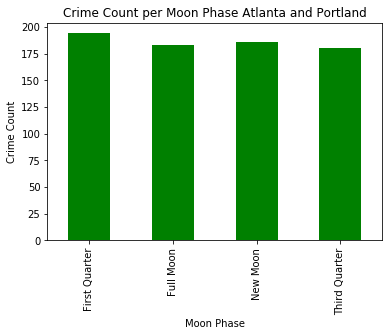

In [11]:
atl_pdx_moon_graph = total_atl_pdx.plot(kind="bar", color="green")

plt.title('Crime Count per Moon Phase Atlanta and Portland')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')

plt.savefig("BarAtl&PDX.png")

In [41]:
atl_pdx_nasa = pd.merge(nasa_df, atl_pdx_moon_merge, how="outer", on = "Date")
atl_pdx_nasa = atl_pdx_nasa.rename(columns={"Moon Phase_x":"% of Moon", "Moon Phase_y":"Moon Phase"})
atl_pdx_nasa.head(20)

,Unnamed: 0,% of Moon,Date,Total Crime,Total Violent Crime,Total NonViolent Crime,Moon Phase,Special,Special Type
0,0.0,91.903333,4/1/15,128.0,35.0,93.0,NaN,NaN,NaN
1,1.0,98.278750,8/1/15,259.0,74.0,185.0,NaN,NaN,NaN
2,2.0,67.615417,12/1/15,271.0,69.0,202.0,NaN,NaN,NaN
3,3.0,94.082500,2/1/15,97.0,27.0,70.0,NaN,NaN,NaN
4,4.0,85.044000,1/1/15,131.0,41.0,90.0,NaN,NaN,NaN
5,5.0,99.228750,7/1/15,273.0,81.0,192.0,Full Moon,n,NaN
6,6.0,98.221250,6/1/15,244.0,61.0,183.0,NaN,NaN,NaN
7,7.0,84.215833,3/1/15,96.0,34.0,62.0,NaN,NaN,NaN
8,8.0,93.216667,5/1/15,292.0,72.0,220.0,NaN,NaN,NaN
9,9.0,70.312500,11/1/15,256.0,65.0,191.0,NaN,NaN,NaN


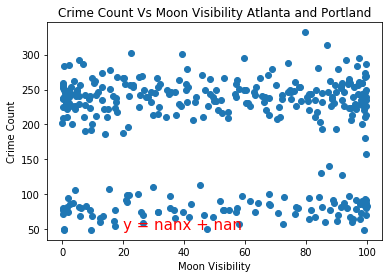

In [42]:
# Crime Count Vs Visible Moon Atl PDX (%) Linear Regression
y_values = atl_pdx_nasa['Total Crime']
x_values = atl_pdx_nasa['% of Moon']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.title('Crime Count Vs Moon Visibility Atlanta and Portland')
plt.ylabel("Crime Count")
plt.xlabel("Moon Visibility")
plt.show()

#plt.savefig("CrimeVsMoonAtl_Pdx.png")

In [51]:
bd_atl_pdx = atl_pdx_moon_merge.groupby(['Moon Phase'])[['Total Violent Crime', 'Total NonViolent Crime']].mean()
bd_atl_pdx = bd_atl_pdx.reset_index()
bd_atl_pdx.head()

,Moon Phase,Total Violent Crime,Total NonViolent Crime
0,First Quarter,49.545455,145.363636
1,Full Moon,50.230769,137.538462
2,New Moon,47.250000,140.750000
3,Third Quarter,46.666667,134.583333


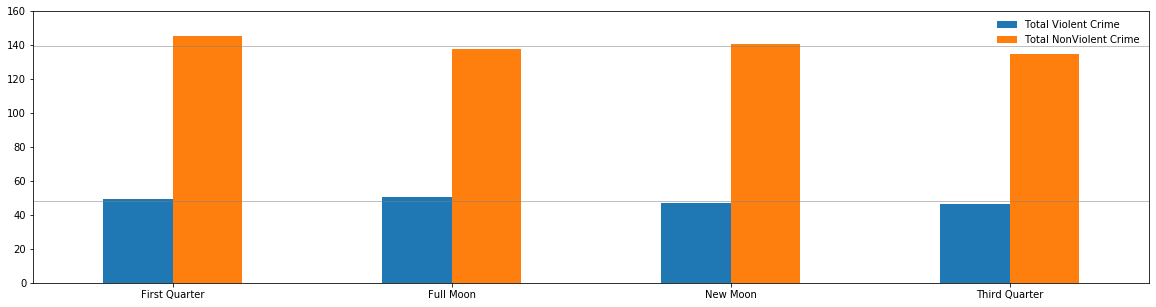

<Figure size 432x288 with 0 Axes>

In [74]:
# Pandas can also plot multiple columns if the DataFrame includes them
v_nv_plot = bd_atl_pdx.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
v_nv_plot.set_xticklabels(bd_atl_pdx['Moon Phase'], rotation=0)

v_nv_plot.axhline(y=bd_atl_pdx['Total Violent Crime'].mean(), linewidth=.5, color='grey')
v_nv_plot.axhline(y=bd_atl_pdx['Total NonViolent Crime'].mean(), linewidth=.5, color='grey')

v_nv_plot.legend(loc='upper right', frameon=False)
plt.ylim(0,160)
plt.show()
plt.tight_layout()

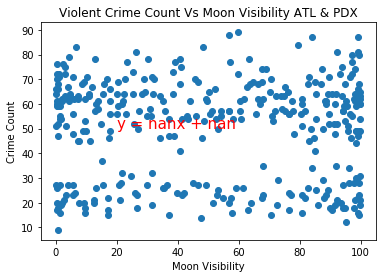

In [56]:
y_values = atl_pdx_nasa['Total Violent Crime']
x_values = atl_pdx_nasa['% of Moon']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.title('Violent Crime Count Vs Moon Visibility ATL & PDX')
plt.ylabel("Crime Count")
plt.xlabel("Moon Visibility")
plt.show()

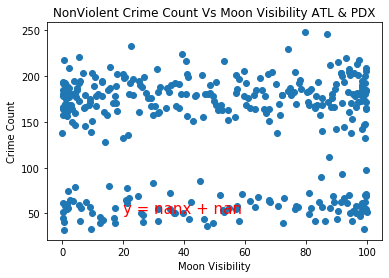

In [57]:
y_values = atl_pdx_nasa['Total NonViolent Crime']
x_values = atl_pdx_nasa['% of Moon']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.title('NonViolent Crime Count Vs Moon Visibility ATL & PDX')
plt.ylabel("Crime Count")
plt.xlabel("Moon Visibility")
plt.show()